We will start with k Means clustering, an unsupervised dataset. It assigns $k$ centroids or mediods (center or median point of a group of datapoints), and groups points based on their proximity to each centroid/medoid. This can be applied to any number of dimensions, and different metrics can be used.

$k$ means follows the following algorithm:
1) Randomly pick $k$ data points as the initial cluster centers
2) Assign each data point to the nearest initial cluster centers using a distance metric. Typically, for comparable data, we use the 2-norm: $d(x,y)^2 = ||x - y||_2^2$
3) Assign the centroids by computing the center of each cluster
4) Repeat 2, 3 until either cluster assignments do not change or until a tolerance hyperparameter/number of iterations hyperparamter has been achieved

This can be summarized as an objective function minimization - minimizing the sum of squared errors within each cluster (SSE), also known as the cluster inertia: $$I = SSE = \sum_{i = 1}^n\sum_{c = 1}^k w^{(i, c)} ||x^{(i)} - \mu^{(c)}||_2^2,$$ where $\mu^{(c)}$ is the centroid for cluster $c$ and $w^{(i,c)} = 1$ if $x^{(i)}$ is part of the cluster $c$ and 0 otherwise.

This is sensitive to the initial choice of centroids, since it is purely deterministic after that. Two major ways of getting around this are:
1) Randomly reinintialize the algorithm a few times and keep the best one.
2) Choose the first cluster center randomly, then choose the other $k-1$ initial cluster centers based on sampling a probability distribution that is proportional to the distance away from the first cluster center. This is known as k-means++, and scikit learn implements this by default. The probability distribution is simply the squared distance of each point away from the initial choice divided by the sum of all possible squared distances to that point.

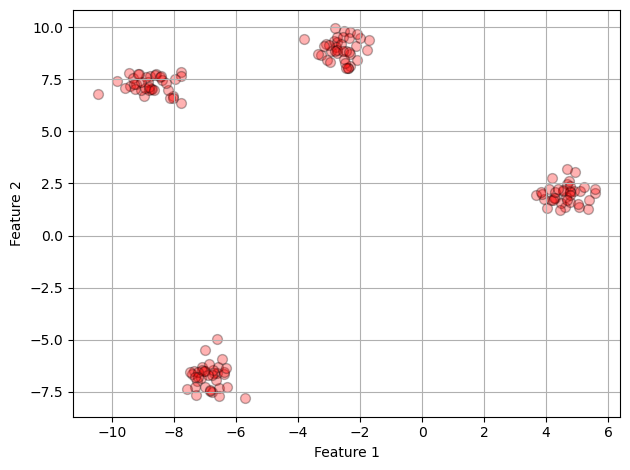

In [1]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=150,
                  n_features=2,
                  centers=4,
                  cluster_std=0.5,
                  shuffle=True,
                  random_state=42)

import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c='red', marker='o', edgecolor='black', s=50, alpha=0.3)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid()
plt.tight_layout()
plt.show()

In [2]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=4,
            init='random', # default is 'k-means++'
            n_init=10, # reinitialize 10 times
            max_iter=300, # 300 iterations per initialization at most
            tol=1e-4, # stop before max_iter if the clusters do not change by more than 1e-4
            random_state=42)

y_km = km.fit_predict(X)

c:\Users\sadit\miniconda3\envs\dataexercises\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


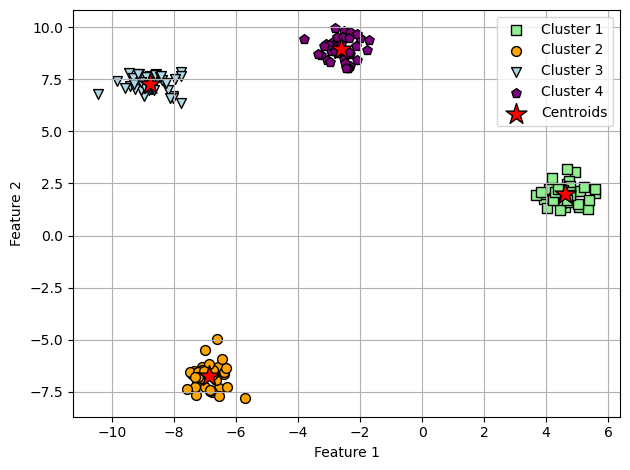

In [3]:
plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1], s=50, c='lightgreen', marker='s', edgecolor='black', label='Cluster 1')
plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1], s=50, c='orange', marker='o', edgecolor='black', label='Cluster 2')
plt.scatter(X[y_km == 2, 0], X[y_km == 2, 1], s=50, c='lightblue', marker='v', edgecolor='black', label='Cluster 3')
plt.scatter(X[y_km == 3, 0], X[y_km == 3, 1], s=50, c='purple', marker='p', edgecolor='black', label='Cluster 4')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=250, marker='*', c='red', edgecolor='black', label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()

This is a form of hard clustering where each point can only belong to one cluster. Soft/Fuzzy clustering involves allowing $w^{(i,c)}$ to range from 0 to 1, representing a probability of point $x^{(i)}$ belonging to cluster $c$.

One of the issues with both methods here is the necessity of an pre-ascribed number of clusters. However, one can typically figure out how many means to assign by computing the inertia for various values of $k$ and figuring out where the "elbow" lies, i.e. where the inertia (distortion) seems to stop decreasing sharply.

c:\Users\sadit\miniconda3\envs\dataexercises\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\sadit\miniconda3\envs\dataexercises\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\sadit\miniconda3\envs\dataexercises\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\sadit\miniconda3\envs\dataexercises\Lib\site-packages\sklearn\clust

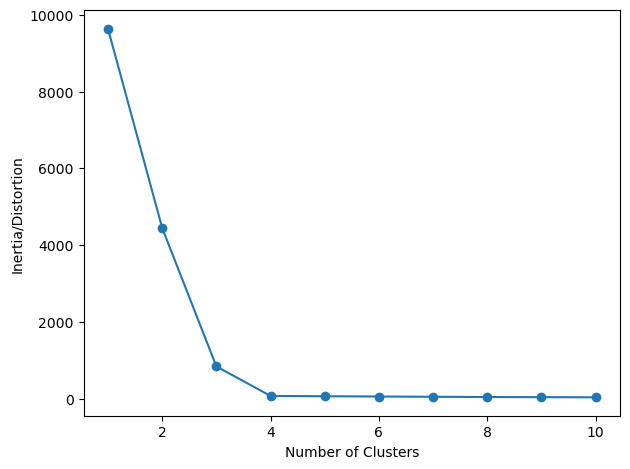

In [6]:
inertias = []
for i in range(1, 11):
    km = KMeans(n_clusters=i,
    init='k-means++',
    n_init=10,
    max_iter=300,
    random_state=42);

    km.fit(X);
    inertias.append(km.inertia_)

plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia/Distortion')
plt.tight_layout()
plt.show()

The elbow here is at 4, which is the number of clusters we have. Adding more doesn't do much to change the inertias.